In [1]:
#Import Necessary libraries

import numpy as np, pandas as pd, matplotlib.pyplot  as plt, seaborn as sns
import datetime
from  matplotlib.ticker import FuncFormatter
%matplotlib inline 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 1000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# Import the raw data

house = pd.read_csv('train.csv')

###### Data Analysis

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(house.shape)
print()

(1460, 81)



In [7]:
for i in house.columns:
    print(i, house[i].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscV

#####  Data Cleansing (Elimination)

In [8]:
house.dropna(axis=1, how='all', inplace=True)

######  Find total NaN values

In [9]:
house.isna().sum().sum()

6965

###### Check if any Row is insignificant with NA values in more than 10 fields

In [10]:
# Count total NaN at each row in a DataFrame

for i in range(len(house.index)) :
    if house.iloc[i].isnull().sum() > 10 : 
            print(" Total NaN in row", i + 1, ":", house.iloc[i].isnull().sum())

 Total NaN in row 40 : 15
 Total NaN in row 288 : 11
 Total NaN in row 343 : 11
 Total NaN in row 376 : 11
 Total NaN in row 521 : 14
 Total NaN in row 534 : 15
 Total NaN in row 706 : 14
 Total NaN in row 1012 : 15
 Total NaN in row 1031 : 11
 Total NaN in row 1036 : 11
 Total NaN in row 1144 : 11
 Total NaN in row 1180 : 14
 Total NaN in row 1219 : 15
 Total NaN in row 1322 : 11


###### Check if any Column is insignificant with NA values

In [11]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Dataaset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [12]:
missing_values_table(house)

Dataaset has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


###### Rating fields are mapped with a numeric value. Replacing NA with ZERO

In [13]:
dict0 = {'NA': 0 ,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}
dict1 = {'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6}

house['FireplaceQu'] = house['FireplaceQu'].map(dict0)
house['PoolQC'] = house['PoolQC'].map(dict0)
house['GarageQual'] = house['GarageQual'].map(dict0)
house['GarageCond'] = house['GarageCond'].map(dict0)
house['BsmtCond'] = house['BsmtCond'].map(dict0)
house['BsmtQual'] = house['BsmtQual'].map(dict0)
house['BsmtFinType2'] = house['BsmtFinType2'].map(dict1)
house['BsmtFinType1'] = house['BsmtFinType1'].map(dict1)

house['FireplaceQu'].fillna(0, inplace=True)
house['PoolQC'].fillna(0, inplace=True)
house['GarageQual'].fillna(0, inplace=True)
house['GarageCond'].fillna(0, inplace=True)
house['BsmtCond'].fillna(0, inplace=True)
house['BsmtQual'].fillna(0, inplace=True)

house['BsmtFinType1'].fillna(0, inplace=True)
house['BsmtFinType2'].fillna(0, inplace=True)

In [14]:
house.shape

(1460, 81)

In [15]:
temp = house[house['GarageYrBlt'].isna()].filter(['GarageCars', 'GarageArea'])
temp.value_counts()

GarageCars  GarageArea
0           0             81
dtype: int64

###### Impute missing values

In [16]:
dict2 = {'GdPrv': "Fence_GdPrv",'MnPrv':"Fence_MnPrv",'GdWo':"Fence_GdWd",'MnWw':"Fence_MnWdWire"}

house['Fence'] = house['Fence'].map(dict2)
house['Fence'].fillna('FenceNO', inplace=True)

house['Alley'] = house['Alley'].map({'Grvl': 'Alley_Gravel', 'Pave': 'Alley_Paved'})
house['Alley'].fillna('AlleyNO', inplace=True)

house['GarageFinish'] = house['GarageFinish'].map({'Fin': 'GrGFin_Good', 'RFn': 'GrGFin_Rough', 'Unf': 'GrGFin_Unfinished'})
house['GarageFinish'].fillna('GarageNO', inplace=True)

house['Electrical'] = house['Electrical'].map({'SBrkr': 'Fuse_Good', 'FuseA': 'Fuse_Avg', 'FuseF': 'Fuse_Fair' , 'FuseP': 'Fuse_Poor' , 'Mix': 'Fuse_Mix'})
house['Electrical'].fillna('Fuse_Mix', inplace=True)
##house['Electrical'] = house['Electrical'].fillna(house['Electrical'].mode().iloc[0])

house['MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 'MasVaneer_BrkCmn', 'BrkFace': 'MasVaneer_BrkFace', 'CBlock': 'MasVaneer_Cinder' , 'Stone': 'MasVaneer_Stone' , 'None': 'MasVaneer_None'})
house['MasVnrType'].fillna('MasVaneer_None', inplace=True)

house['MiscFeature'] = house['MiscFeature'].map({'Elev': 'MiscFeature_Elev', 'Gar2': 'MiscFeature_Gar2', 'Othr': 'MiscFeature_Other', 'Shed': 'MiscFeature_Shed', 'TenC': 'MiscFeature_Tennis'})
house['MiscFeature'].fillna('MiscFeature_None', inplace=True)

house['BsmtExposure'] = house['BsmtExposure'].map({'Gd': 'BExp_Good', 'Av': 'BExp_Avg', 'Mn': 'BExp_Min', 'No': 'BExp_No'})
house['BsmtExposure'].fillna('BExp_NA', inplace=True)

house['GarageType'] = house['GarageType'].map({'2Types': 'GrG_Two', 'Attchd': 'GrG_Attached', 'Basment': 'GrG_Basement', 'BuiltIn': 'GrG_Builtin', 'Detchd': 'GrG_Detached', 'CarPort': 'GrG_CarPort'})
house['GarageType'].fillna('GrG_NA', inplace=True)

# If GarageYrBlt is null it means the plot doesnt have a car park. So filling Year as Zero. Treating Year as a Numeric value
#house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].mode().iloc[0])
house['GarageYrBlt'].fillna(0, inplace=True)
house['LotFrontage'].fillna(0, inplace=True)
house['MasVnrArea'].fillna(0, inplace=True)

###### MSSubClass contains numeric values for categorizing. So converting to String/Object. Will use OHCoding for this field

In [17]:
house['MSSubClass'] = house['MSSubClass'].astype('object')

In [18]:
#house.info()

In [19]:
house.drop(['Id'], inplace=True, axis=1)

In [20]:
missing_values_table(house)

Dataaset has 80 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [21]:
house.isna().sum().sum()

0

In [22]:
#house.columns

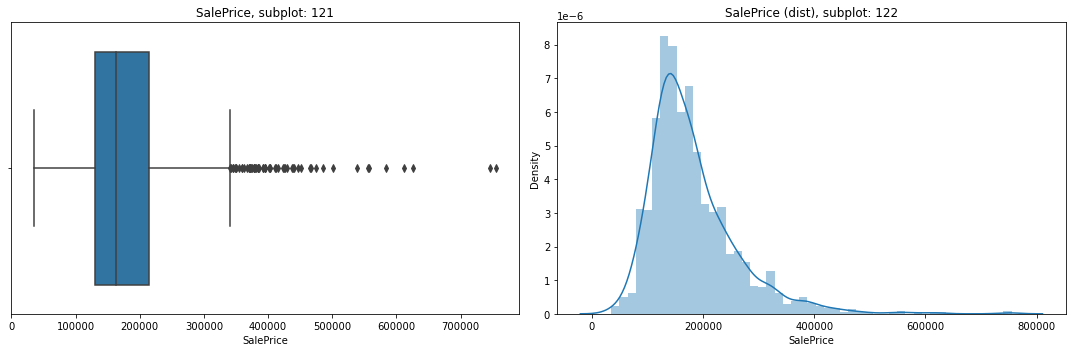

In [23]:
target_col = ['SalePrice']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 5)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(house[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(house[i])
    c = c + 1

plt.tight_layout()
plt.show();

In [24]:
#####  Remove data above the 90th percentile of Target Variable. Considering them as Outliers
#house = house.query('SalePrice <= SalePrice.quantile(.9)')

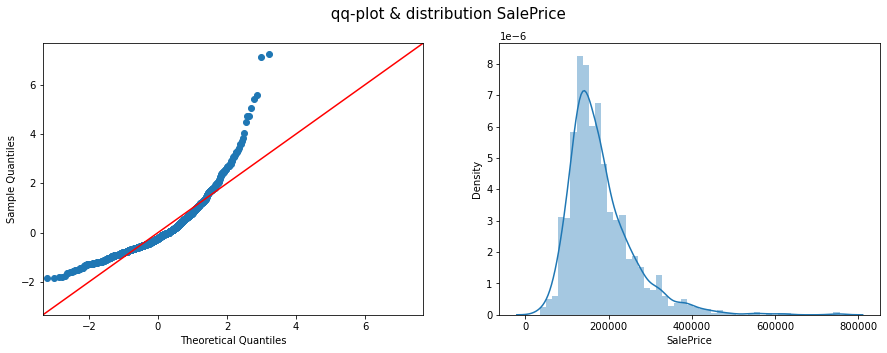

In [25]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(house['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(house['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

#### Taking Log on Target variable to address LEFT skew

In [26]:
house['SalePrice_log'] = np.log(house['SalePrice'])
saleprice = house[['SalePrice']].copy()
house = house.drop('SalePrice',axis=1) # removing the orignal variable

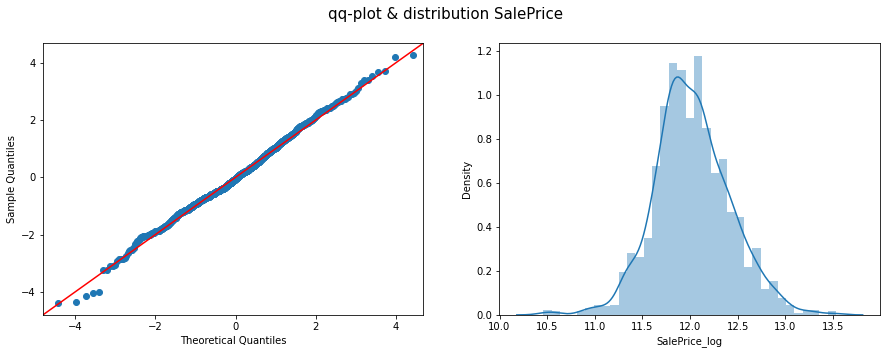

In [27]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(house['SalePrice_log'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(house['SalePrice_log'] , kde = True, hist=True, ax = ax[1])
plt.show()

## Numerical Variables Analysis

In [28]:
num_col = house.select_dtypes(include=np.number).columns.tolist()
num_data = house[num_col]
num_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice_log
0,65.0,8450,7,5,2003,2003,196.0,4.0,3.0,6.0,706,1.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,0.0,2003.0,2,548,3.0,3.0,0,61,0,0,0,0,0.0,0,2,2008,12.247694
1,80.0,9600,6,8,1976,1976,0.0,4.0,3.0,5.0,978,1.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,3.0,1976.0,2,460,3.0,3.0,298,0,0,0,0,0,0.0,0,5,2007,12.109011
2,68.0,11250,7,5,2001,2002,162.0,4.0,3.0,6.0,486,1.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,3.0,2001.0,2,608,3.0,3.0,0,42,0,0,0,0,0.0,0,9,2008,12.317167
3,60.0,9550,7,5,1915,1970,0.0,3.0,4.0,5.0,216,1.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,4.0,1998.0,3,642,3.0,3.0,0,35,272,0,0,0,0.0,0,2,2006,11.849398
4,84.0,14260,8,5,2000,2000,350.0,4.0,3.0,6.0,655,1.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3.0,2000.0,3,836,3.0,3.0,192,84,0,0,0,0,0.0,0,12,2008,12.429216


### Analyze numeric field's distribution

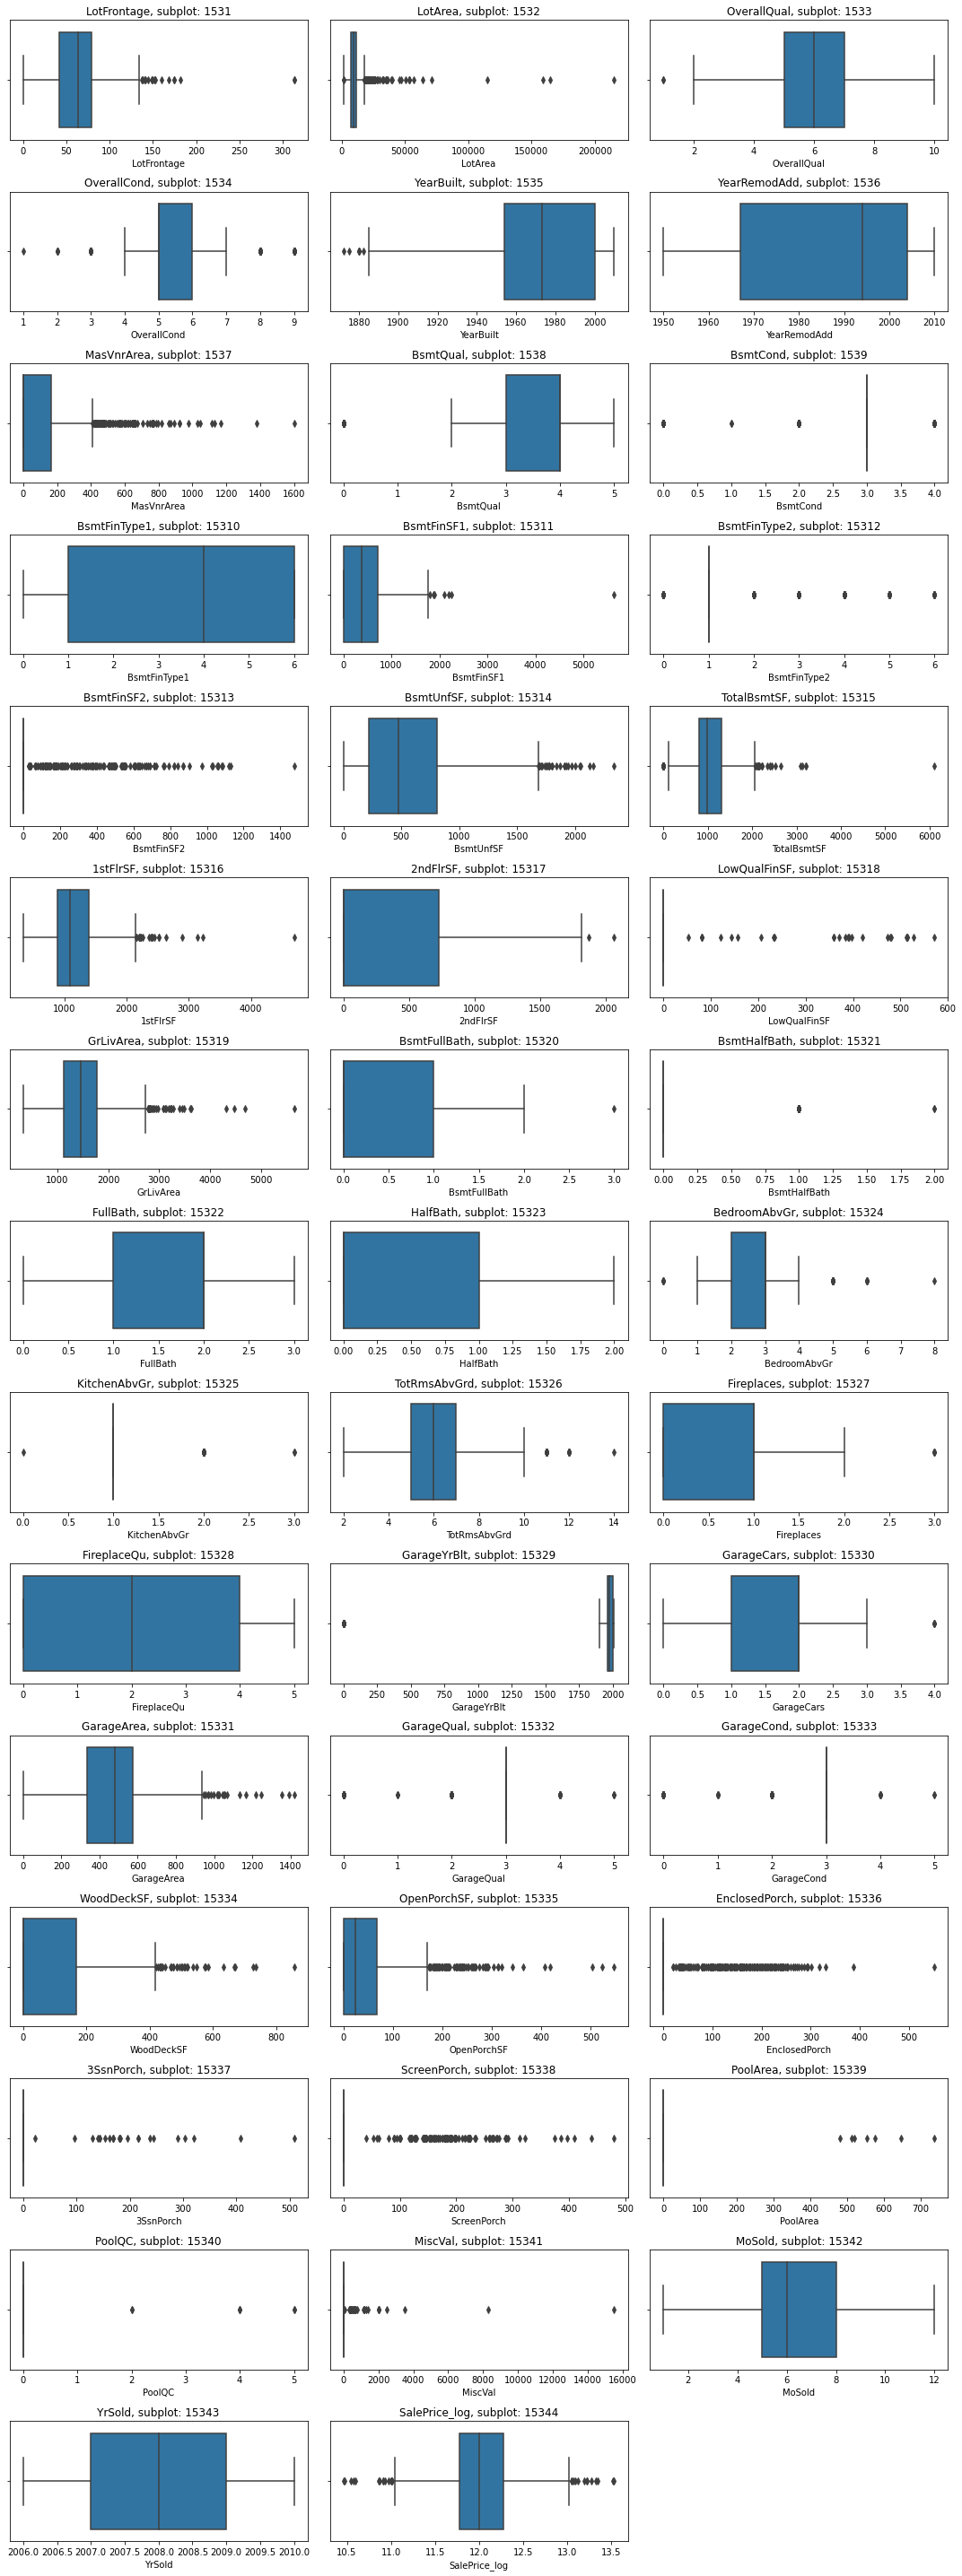

In [29]:
a = 15 # number of rows      #  15 x 3 =  45 graphs.. (44 Columns)
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,60))
fig.set_size_inches(15, 40)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

### Check Correlation amoung the numeric columns

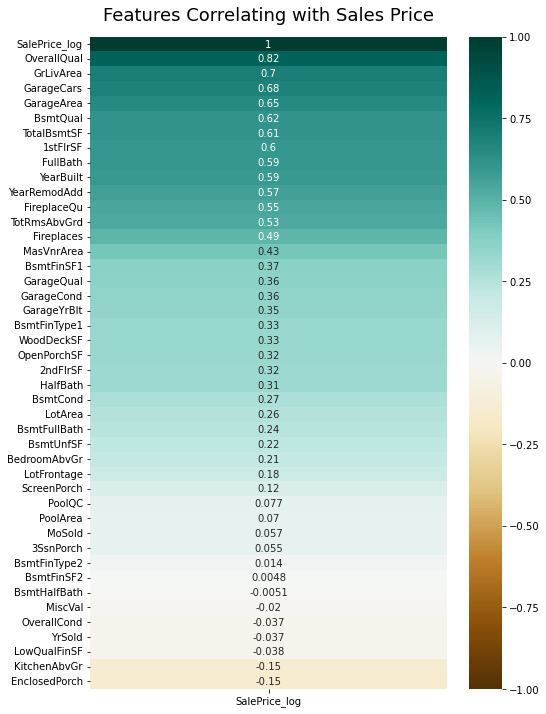

In [30]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(num_data.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [31]:
skew_in_vars = num_data.iloc[:,:-1].apply(lambda x: skew(x))
skew_in_vars.sort_values(ascending=False)

MiscVal          24.451640
PoolQC           15.942166
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
BsmtFinType2      3.293608
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
LotFrontage       0.267547
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
FireplaceQu       0.112654
YrSold            0.096170
FullBath          0.036524
BsmtFinType1     -0.159013
GarageCars       -0.342197
YearRemodAdd     -0.503044
Y

######  #Simple Imputer - Not used

In [32]:
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

#num_data['LotFrontage'] = imputer.fit_transform(num_data[['LotFrontage']].copy()).ravel()
#num_data['GarageYrBlt'] = imputer.fit_transform(num_data[['GarageYrBlt']].copy()).ravel()
#num_data['MasVnrArea'] = imputer.fit_transform(num_data[['MasVnrArea']].copy()).ravel()

### Apply Log on X variables which got high skew. 

In [33]:
high_skew = skew_in_vars[skew_in_vars > 0.2]
skew_index = high_skew.index
skew_index

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'MoSold'],
      dtype='object')

In [34]:
#num_data[skew_index].head()

In [35]:
## Transforming X-Feature (natural logarithm of 1+x to handle fields having values close to zero) for the 26 features that got skew more than 0.5

for i in skew_index:
    num_data[i] = np.log1p(num_data[i])

In [36]:
num_data[skew_index].head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold
0,4.189655,9.042040,2.079442,1.791759,5.283204,6.561031,0.693147,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,0.693147,1.386294,0.693147,2.197225,0.000000,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,0.0,1.098612
1,4.394449,9.169623,1.945910,2.197225,0.000000,6.886532,0.693147,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,0.000000,1.386294,0.693147,1.945910,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.791759
2,4.234107,9.328212,2.079442,1.791759,5.093750,6.188264,0.693147,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,0.693147,1.386294,0.693147,1.945910,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,0.0,2.302585
3,4.110874,9.164401,2.079442,1.791759,0.000000,5.379897,0.693147,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.000000,1.386294,0.693147,2.079442,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,0.0,1.098612
4,4.442651,9.565284,2.197225,1.791759,5.860786,6.486161,0.693147,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,0.693147,1.609438,0.693147,2.302585,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,0.0,2.564949


In [37]:
num_data.apply(lambda x: skew(x)).sort_values(ascending=False)

PoolQC           14.956201
PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
BsmtFinType2      1.861672
HalfBath          0.565586
MasVnrArea        0.503014
BsmtFullBath      0.418782
2ndFlrSF          0.289346
Fireplaces        0.181896
GarageArea        0.179796
WoodDeckSF        0.153379
SalePrice_log     0.121210
FireplaceQu       0.112654
YrSold            0.096170
1stFlrSF          0.080032
FullBath          0.036524
GrLivArea        -0.006134
OpenPorchSF      -0.023373
TotRmsAbvGrd     -0.058198
LotArea          -0.137263
BsmtFinType1     -0.159013
OverallCond      -0.253754
GarageCars       -0.342197
YearRemodAdd     -0.503044
OverallQual      -0.590370
YearBuilt        -0.612831
BsmtFinSF1       -0.617774
MoSold           -0.912485
BedroomAbvGr     -1.232409
BsmtQual         -1.286247
L

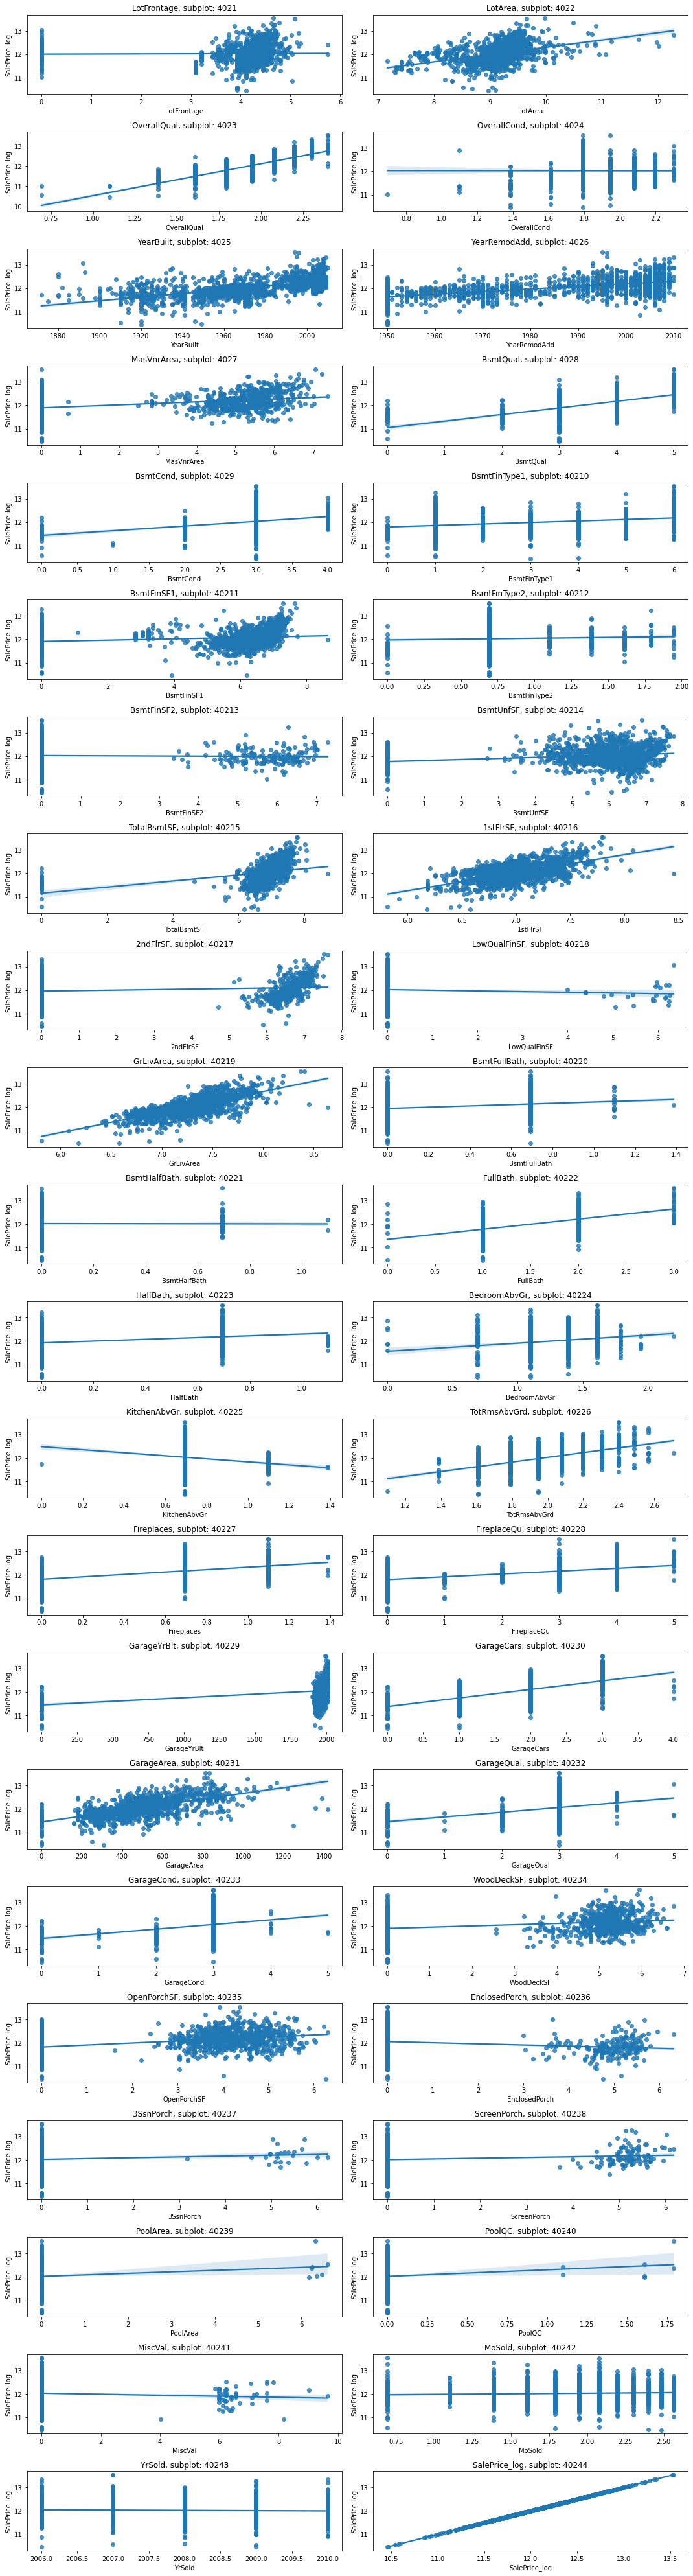

In [38]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.regplot(num_data[i], num_data['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

###### Fetch features which got correlation (>0.2) and use them for model building

In [39]:
#print(num_data.corr())
num_corr_data = num_data.corr()
top_corr_num_col = num_corr_data.index[abs(num_corr_data['SalePrice_log'])>0.2]
top_corr_num_col

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice_log'],
      dtype='object')

<AxesSubplot:>

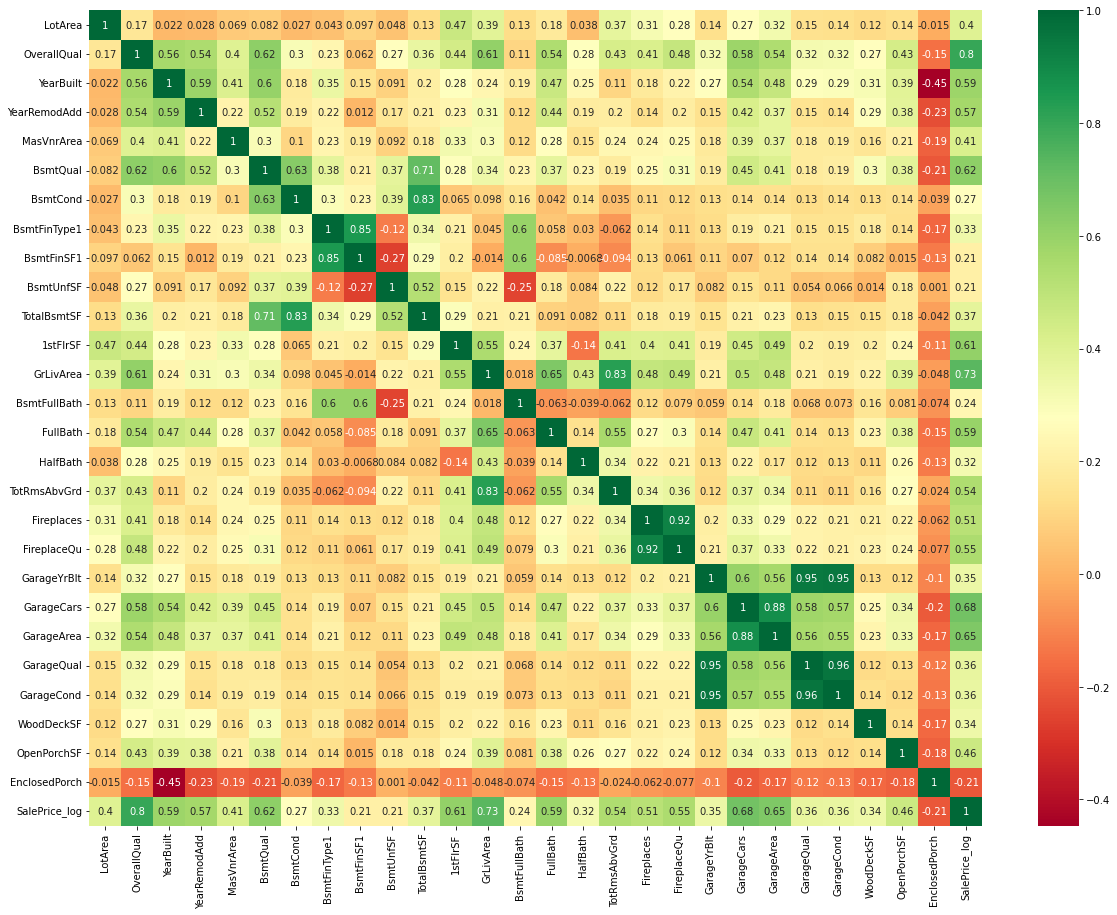

In [40]:
num_data_f = num_data[top_corr_num_col]

plt.figure(figsize=(20,15))
sns.heatmap(num_data_f.corr(),annot=True,cmap="RdYlGn")

In [41]:
num_data_f.shape

(1460, 28)

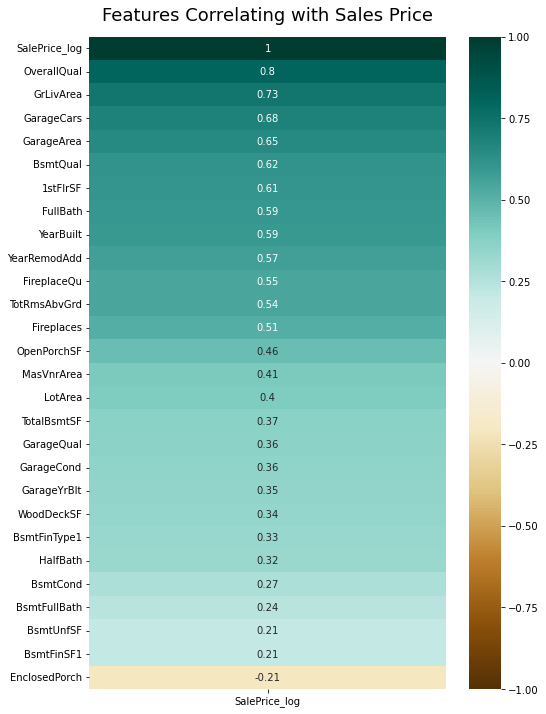

In [42]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(num_data_f.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

### Linear Regression is feasible as several features are well correlated and linear with target variable.

## Categorical Variable Analysis

In [43]:
cat_col = house.select_dtypes(include=object).columns.tolist()
house[cat_col].shape

(1460, 36)

In [44]:
cat_house = house[cat_col]

In [45]:
cat_house.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

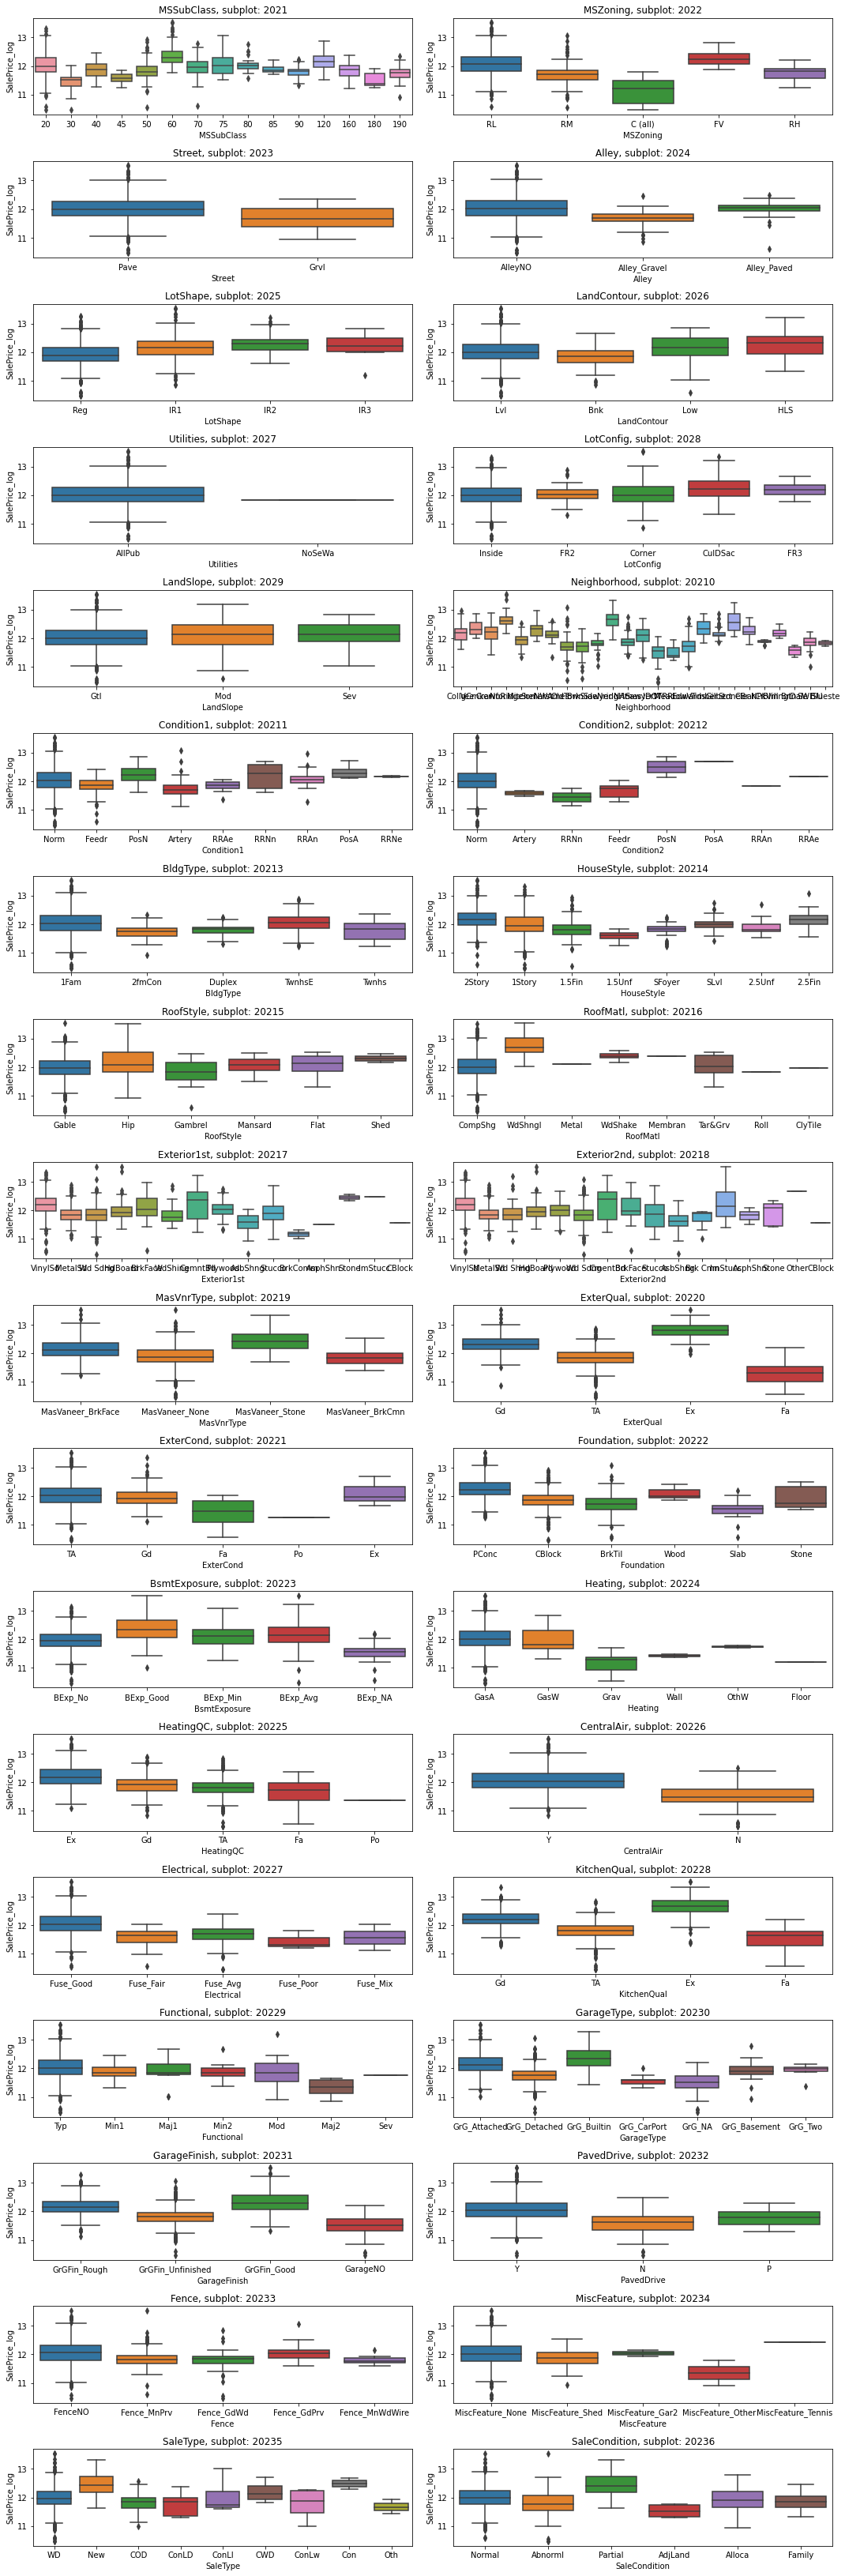

In [46]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in cat_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cat_house[i], house['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### The categorical variables are corelated to the target variable Saleprice_log. Mean and  distrubition are varying for each features of a particular variable

In [47]:
print(cat_house.columns)
cat_house.shape

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


(1460, 36)

In [48]:
cat_house.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,AlleyNO,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,MasVaneer_BrkFace,Gd,TA,PConc,BExp_No,GasA,Ex,Y,Fuse_Good,Gd,Typ,GrG_Attached,GrGFin_Rough,Y,FenceNO,MiscFeature_None,WD,Normal
1,20,RL,Pave,AlleyNO,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,MasVaneer_None,TA,TA,CBlock,BExp_Good,GasA,Ex,Y,Fuse_Good,TA,Typ,GrG_Attached,GrGFin_Rough,Y,FenceNO,MiscFeature_None,WD,Normal
2,60,RL,Pave,AlleyNO,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,MasVaneer_BrkFace,Gd,TA,PConc,BExp_Min,GasA,Ex,Y,Fuse_Good,Gd,Typ,GrG_Attached,GrGFin_Rough,Y,FenceNO,MiscFeature_None,WD,Normal
3,70,RL,Pave,AlleyNO,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,MasVaneer_None,TA,TA,BrkTil,BExp_No,GasA,Gd,Y,Fuse_Good,Gd,Typ,GrG_Detached,GrGFin_Unfinished,Y,FenceNO,MiscFeature_None,WD,Abnorml
4,60,RL,Pave,AlleyNO,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,MasVaneer_BrkFace,Gd,TA,PConc,BExp_Avg,GasA,Ex,Y,Fuse_Good,Gd,Typ,GrG_Attached,GrGFin_Rough,Y,FenceNO,MiscFeature_None,WD,Normal


## One Hot Coding for Categorical Variables

In [49]:
Fence_name = pd.get_dummies(house['Fence'] , drop_first= True)
OHC_house = Fence_name

Alley_name = pd.get_dummies(house['Alley'] , drop_first= True)
OHC_house = pd.concat([OHC_house,Alley_name], axis=1)

GarageFinish_name = pd.get_dummies(house['GarageFinish'] , drop_first= True)
OHC_house = pd.concat([OHC_house,GarageFinish_name], axis=1)

Electrical_name = pd.get_dummies(house['Electrical'] , drop_first= True)
OHC_house = pd.concat([OHC_house,Electrical_name], axis=1)

# Cinder Block not present in TRAINing dataset. (drop_first= False) 
# So retaining all the other categories and not dropping one category in dummy column creation
MasVnr_name = pd.get_dummies(house['MasVnrType'] , drop_first= False)
OHC_house = pd.concat([OHC_house,MasVnr_name], axis=1)

# 'Elevator' and 'Garage 2' not present in TRAINing dataset. (drop_first= False) 
# So retaining all the other categories and not dropping one category in dummy column creation
MiscFeature_name = pd.get_dummies(house['MiscFeature'] , drop_first= False)
OHC_house = pd.concat([OHC_house,MiscFeature_name], axis=1)

BsmtExposure_name = pd.get_dummies(house['BsmtExposure'] , drop_first= True)
OHC_house = pd.concat([OHC_house,BsmtExposure_name], axis=1)

GarageType_name = pd.get_dummies(house['GarageType'] , drop_first= True)
OHC_house = pd.concat([OHC_house,GarageType_name], axis=1)

#print(OHC_house.shape)

# removing the orignal variable
cat_house = cat_house.drop(['Fence', 'Alley', 'GarageFinish', 'Electrical', 'MasVnrType', 'MiscFeature' ,'BsmtExposure', 'GarageType'],axis=1) 

print(cat_house.shape)

(1460, 28)


In [50]:
# Fence 4, Alley 2, GarageFinish 3, Electical 4, Masnary Veneer 4, Misc Feature 5, Bsmt Exp 4, Garage 6
# Total 32 OHC fields 

print(OHC_house.shape)
print(cat_house.shape)  # 36 Categorical fields MINUS the 8 OHC fields

(1460, 32)
(1460, 28)


In [51]:
OHC_house.columns

Index(['Fence_GdPrv', 'Fence_GdWd', 'Fence_MnPrv', 'Fence_MnWdWire',
       'Alley_Gravel', 'Alley_Paved', 'GrGFin_Good', 'GrGFin_Rough',
       'GrGFin_Unfinished', 'Fuse_Fair', 'Fuse_Good', 'Fuse_Mix', 'Fuse_Poor',
       'MasVaneer_BrkCmn', 'MasVaneer_BrkFace', 'MasVaneer_None',
       'MasVaneer_Stone', 'MiscFeature_Gar2', 'MiscFeature_None',
       'MiscFeature_Other', 'MiscFeature_Shed', 'MiscFeature_Tennis',
       'BExp_Good', 'BExp_Min', 'BExp_NA', 'BExp_No', 'GrG_Basement',
       'GrG_Builtin', 'GrG_CarPort', 'GrG_Detached', 'GrG_NA', 'GrG_Two'],
      dtype='object')

In [52]:
## Above One Hot Coding fields PLUS Original Numeric Fields

house_num_all =  pd.concat([OHC_house,num_data_f],axis=1)
house_num_all.shape

(1460, 60)

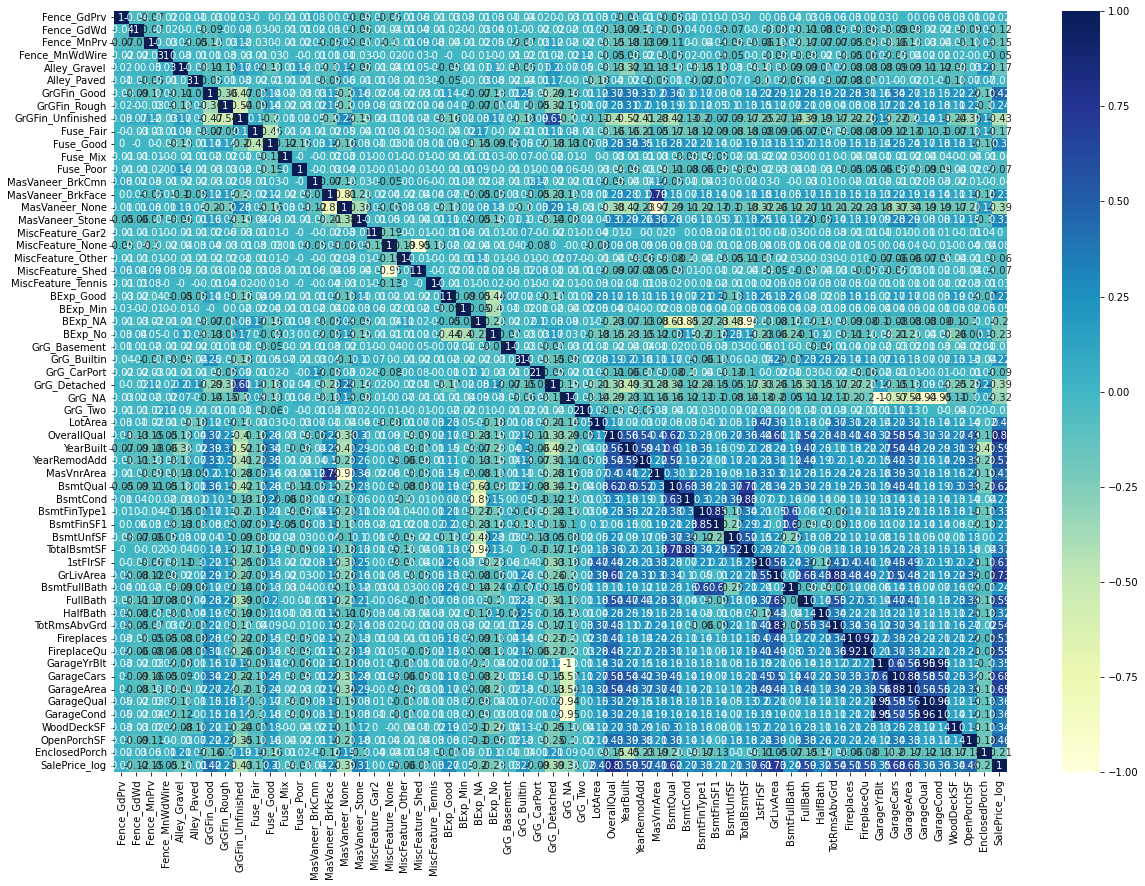

In [53]:
plt.figure(figsize=(20,14))
sns.heatmap(round(house_num_all.corr(),2), annot= True, cmap='YlGnBu')
plt.show()

In [54]:
#cat_house.info()

###### One Hot Coding Bulk

In [55]:
cat_col = cat_house.select_dtypes(include=object).columns.tolist()
print(cat_col)
cat_house = house[cat_col]

cat_house = pd.get_dummies(cat_house)

print(cat_house.info())
print(cat_house.shape)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 197 entries, MSSubClass_20 to SaleCondition_Partial
dtypes: uint8(197)
memory usage: 281.0 KB
None
(1460, 197)


In [56]:
## Above BULK OHC fields PLUS the prior OHC and Numeric Fields

house_all =  pd.concat([cat_house,house_num_all],axis=1)
house_all.shape

(1460, 257)

###### Describe all numeric fields

In [57]:
#pd.options.display.max_rows = house_all.shape[1]
house_all.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass_20,1460.0,0.367123,0.482186,0.000000,0.000000,0.000000,1.000000,1.000000
MSSubClass_30,1460.0,0.047260,0.212268,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_40,1460.0,0.002740,0.052289,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_45,1460.0,0.008219,0.090317,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_50,1460.0,0.098630,0.298267,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_60,1460.0,0.204795,0.403690,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_70,1460.0,0.041096,0.198580,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_75,1460.0,0.010959,0.104145,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_80,1460.0,0.039726,0.195382,0.000000,0.000000,0.000000,0.000000,1.000000
MSSubClass_85,1460.0,0.013699,0.116277,0.000000,0.000000,0.000000,0.000000,1.000000


In [58]:
house_all[['GarageArea','YearRemodAdd', 'YearBuilt']].describe().T

,count,mean,std,min,25%,50%,75%,max
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.0,1418.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.0,1994.0,2004.0,2010.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.0,2010.0


In [59]:
for i in house_all.columns:
    if house_all[i].nunique() > 2:
        print(i, house_all[i].nunique())

LotArea 1073
OverallQual 10
YearBuilt 112
YearRemodAdd 61
MasVnrArea 327
BsmtQual 5
BsmtCond 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
GrLivArea 861
BsmtFullBath 4
FullBath 4
HalfBath 3
TotRmsAbvGrd 12
Fireplaces 4
FireplaceQu 6
GarageYrBlt 98
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
SalePrice_log 663


In [60]:
house_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 257 entries, MSSubClass_20 to SalePrice_log
dtypes: float64(23), int64(5), uint8(229)
memory usage: 646.0 KB


In [61]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =50)

df_train, df_test = train_test_split(house_all, train_size = 0.7 , random_state=100)

In [62]:
#scaler = MinMaxScaler()
#num_vars = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageCars','GarageArea','SalePrice_log']
#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [63]:
df_train[['GarageArea','YearRemodAdd', 'YearBuilt']].describe().T

,count,mean,std,min,25%,50%,75%,max
GarageArea,1021.0,471.995103,212.213075,0.0,330.0,480.0,576.0,1418.0
YearRemodAdd,1021.0,1984.984329,20.604962,1950.0,1967.0,1994.0,2004.0,2010.0
YearBuilt,1021.0,1971.321254,30.321038,1872.0,1954.0,1973.0,2000.0,2010.0


In [64]:
y_train=df_train.pop('SalePrice_log')
X_train=df_train
df_train.shape

(1021, 256)

In [65]:
#print('X train shape',X_train.shape)
#print('X test shape',X_test.shape)
#print('y train shape',y_train.shape)
#print('y test shape',y_test.shape)

In [66]:
lm = LinearRegression()

In [67]:
%%time
lm.fit(X_train,y_train)

CPU times: total: 78.1 ms
Wall time: 99.9 ms


LinearRegression()

In [68]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.45238925308191114
[ 4.00942318e-02 -3.39495343e-02 -1.34640112e-01 -1.53087391e-01
  2.87474536e-02 -9.49676625e-03  2.75458393e-02 -6.07343962e-02
  2.94273580e-02  4.36198076e-02 -1.63395827e-02  1.02049888e-01
  1.85407794e-02  1.29327781e-01 -1.11053569e-02 -3.74154087e-01
  1.18630270e-01  8.87904811e-02  9.65877819e-02  7.01455547e-02
 -2.57590785e-02  2.57590785e-02 -1.41214777e-03 -1.09278772e-02
  7.32611505e-03  5.01390988e-03 -4.86946570e-03  5.59101226e-03
 -1.84087648e-02  1.76872182e-02  3.24835757e-02 -3.24835757e-02
  2.11561110e-02  4.16263198e-02 -3.08513750e-02 -4.25714370e-02
  1.06403812e-02  1.08474982e-02  2.61712624e-02 -3.70187606e-02
 -5.82352670e-03  7.46837337e-02 -2.52330094e-02  6.19890644e-02
 -2.42885440e-03 -4.17535186e-02  1.20951789e-01 -7.20960890e-02
 -4.62770161e-02  9.96090972e-03 -1.38387462e-01 -6.17615622e-02
 -3.53835641e-02  1.75745081e-02 -4.39394202e-02  7.05091037e-02
  2.27303288e-02  1.97046345e-02  5.07218754e-02 -4.78874315e-02
 -3.

In [69]:
##num_vars = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageCars','GarageArea','SalePrice_log']
#df_test[num_vars] = scaler.transform(df_test[num_vars])

In [70]:
y_test=df_test.pop('SalePrice_log')
X_test=df_test
df_test.shape

(439, 256)

In [71]:
y_train_pred = lm.predict(X_train)
y_test_pred =  lm.predict(X_test)

In [72]:
r2_score(y_true = y_train, y_pred = y_train_pred)

0.9524255042129737

In [73]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.873460187414893

<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

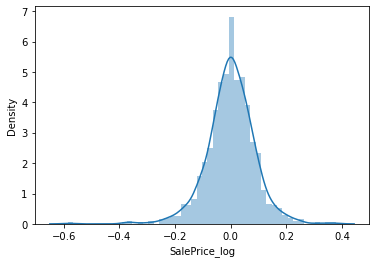

In [74]:
res = y_train - y_train_pred
sns.distplot(res)

In [75]:
# Metrics to assess model performance
rss = np.sum(np.square(y_test - y_test_pred))
print(rss)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

9.155621936395246
0.020855630834613316
0.1444147874513317


In [76]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_test_pred))))

Root Mean Square Error train = 0.08646423509970312
Root Mean Square Error test = 0.1444147874513317


In [77]:
print("R-Square for training data",lm.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for test data",lm.score(X_test,y_test))

R-Square for training data 0.9524255042129737
R-Square for test data 0.873460187414893


In [78]:
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9524255042129737
0.873460187414893
7.6330612943556435
9.155621936395246
0.007476063951376732
0.020855630834613316


### Trying Ridge and Lasso to fit the model better

#### Ridge

In [80]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [82]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.00858413e-02 -5.50380213e-02 -8.28594034e-03  5.18871748e-03
  2.17179766e-02 -2.22111183e-02  4.22309183e-02  2.35314658e-02
 -1.11140293e-02  1.28884305e-02 -1.17470762e-02  2.54809189e-02
 -2.97380809e-02 -1.12431185e-02 -1.17468840e-02 -1.76695808e-01
  4.93802556e-02  4.71673261e-02  5.17886117e-02  2.83596150e-02
 -1.72455503e-02  1.72455503e-02  1.60017626e-02  1.55071966e-02
 -5.03069733e-02  1.87980141e-02 -4.55590779e-02  1.96140234e-02
  8.27411745e-03  1.76709370e-02  1.43686274e-02 -1.43686274e-02
  1.20170545e-02  3.88609184e-02 -3.83366116e-02 -1.36549801e-02
  1.11361882e-03 -1.38710010e-02  4.03781027e-03  9.83319077e-03
 -2.78982872e-02  7.36314366e-03 -1.12699269e-02  3.45603029e-02
  4.18286719e-02 -3.27676645e-02  1.03555570e-01 -9.31638825e-02
 -4.61586014e-02 -4.82025484e-02 -6.05155730e-02 -5.40552504e-02
 -2.63061112e-02  1.19309111e-02 -2.13960586e-02  8.93498622e-02
  6.17272934e-02 -1.52978978e-02  2.76386610e-02 -4.75542810e-02
 -2.71794204e-02  5.55831

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9327025368860008
0.8898788974501759
10.797500896349527
7.967667736880003
0.010575417136483377
0.01814958482205012


#### Lasso

In [84]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [86]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [87]:
lasso.coef_

array([ 2.06902265e-02, -5.26653084e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.06647347e-04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.94324233e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.69779386e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.64993671e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -4.33267860e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.33064159e-02, -7.92558153e-03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.41382370e-02,
        2.05252476e-02, -0.00000000e+00,  1.14130140e-01, -6.41944841e-02,
       -1.08350331e-02, -7.61196683e-03, -0.00000000e+00, -5.08398280e-03,
       -0.00000000e+00,  

In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9193115665528492
0.8909474673867075
12.946007058168245
7.8903527626310845
0.012679732672055088
0.01797346870758789


In [89]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.952426,0.932703,0.919312
1,R2 Score (Test),0.873460,0.889879,0.890947
2,RSS (Train),7.633061,10.797501,12.946007
3,RSS (Test),9.155622,7.967668,7.890353
4,MSE (Train),0.086464,0.102837,0.112604
5,MSE (Test),0.144415,0.134720,0.134065


In [90]:
# split into X and y
X = house_all.loc[:, house_all.columns != 'SalePrice_log'] # predictors in variable X

y = house_all['SalePrice_log'] # response variable in Y


In [91]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object', length=256)

In [92]:
betas = pd.DataFrame(index=X.columns)

In [93]:
betas.rows = X.columns

In [94]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [95]:
pd.set_option('display.max_rows', None)
betas.head(350)

,Linear,Ridge,Lasso
MSSubClass_20,4.009423e-02,0.030086,2.069023e-02
MSSubClass_30,-3.394953e-02,-0.055038,-5.266531e-02
MSSubClass_40,-1.346401e-01,-0.008286,-0.000000e+00
MSSubClass_45,-1.530874e-01,0.005189,0.000000e+00
MSSubClass_50,2.874745e-02,0.021718,0.000000e+00
MSSubClass_60,-9.496766e-03,-0.022211,-4.066473e-04
MSSubClass_70,2.754584e-02,0.042231,0.000000e+00
MSSubClass_75,-6.073440e-02,0.023531,0.000000e+00
MSSubClass_80,2.942736e-02,-0.011114,-0.000000e+00
MSSubClass_85,4.361981e-02,0.012888,0.000000e+00


## Lasso regression has performed better
- R2 score is better in Lasso compared to Ridge and LR
- MSE is also better in Lasso on Test compared to Ridge and LR
- Lasso has helped with Feature Selection

In [96]:
betas['Lasso'].sort_values(ascending=False)[:5]

GrLivArea               0.372724
OverallQual             0.272943
Neighborhood_Crawfor    0.114130
Functional_Typ          0.088574
Neighborhood_NoRidge    0.088164
Name: Lasso, dtype: float64

#### Assignment: Part 2 - Double Alpha for both Ridge and Lasso and check its effect

## Increase lambda for both Ridge and Lasso (Double or Triple) and observe the changes

In [97]:
#Fitting Ridge model for alpha = 24 and printing coefficients which have been penalised
alpha = 24
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.40323186e-02 -5.80300898e-02 -6.68490475e-04  6.01292890e-03
  1.65414790e-02 -1.53529888e-02  4.71536061e-02  1.81591547e-02
 -1.21109584e-02  1.31018595e-03 -4.05496473e-03  1.49524156e-02
 -1.85665606e-02 -1.15690419e-02 -7.80899414e-03 -8.10651302e-02
  2.73433620e-02  2.19471555e-02  2.90507837e-02  2.72382892e-03
 -1.19447362e-02  1.19447362e-02  1.03559629e-02  9.35582080e-03
 -2.94358657e-02  9.72408196e-03 -3.33295268e-02  1.42437987e-02
  7.15976178e-03  1.19259663e-02  5.22969716e-03 -5.22969716e-03
  5.79058044e-03  3.00049388e-02 -2.89101258e-02 -4.76402635e-03
 -2.12136715e-03 -9.20521091e-03  3.82547430e-03  5.37973661e-03
 -1.52712377e-02  1.96164853e-03 -1.26918932e-03  2.68158499e-02
  2.97235846e-02 -2.67653161e-02  7.43826640e-02 -7.12474084e-02
 -3.99210899e-02 -4.60599069e-02 -2.91402764e-02 -3.34938576e-02
 -1.05673121e-02  2.17782534e-03 -7.94644737e-03  6.56807087e-02
  4.37801549e-02 -1.18462638e-02  1.79140170e-02 -3.30286677e-02
 -1.89510676e-02  3.74187

In [98]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9164017847219456
0.8820468765762027
13.412865249748833
8.534343320280493
0.013136988491428829
0.01944041758606035


In [99]:
#Fitting Lasso model for alpha = 0.004 and printing coefficients which have been penalised

alpha = 0.004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004)

In [100]:
lasso.coef_

array([ 1.16542404e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.59395077e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.09704006e-02, -2.51301853e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [101]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8769281553286465
0.8558323018894043
19.746187919495274
10.43106444031771
0.019340046933883717
0.023760966834436698


In [102]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.952426,0.916402,0.876928
1,R2 Score (Test),0.873460,0.882047,0.855832
2,RSS (Train),7.633061,13.412865,19.746188
3,RSS (Test),9.155622,8.534343,10.431064
4,MSE (Train),0.086464,0.114617,0.139068
5,MSE (Test),0.144415,0.139429,0.154146


In [103]:
# split into X and y
#X = house_all.loc[:, house_all.columns != 'SalePrice_log'] # predictors in variable X
#y = house_all['SalePrice_log'] # response variable in Y

In [104]:
# scaling the features - necessary before using Ridge or Lasso
#from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
#cols = X.columns
#X = pd.DataFrame(scale(X))
#X.columns = cols
#X.columns

In [105]:
betas = pd.DataFrame(index=X.columns)

In [106]:
betas.rows = X.columns

In [107]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [108]:
pd.set_option('display.max_rows', None)
betas.head(350)

,Linear,Ridge,Lasso
MSSubClass_20,4.009423e-02,0.024032,0.011654
MSSubClass_30,-3.394953e-02,-0.058030,-0.000000
MSSubClass_40,-1.346401e-01,-0.000668,-0.000000
MSSubClass_45,-1.530874e-01,0.006013,0.000000
MSSubClass_50,2.874745e-02,0.016541,0.000000
MSSubClass_60,-9.496766e-03,-0.015353,-0.000000
MSSubClass_70,2.754584e-02,0.047154,0.000000
MSSubClass_75,-6.073440e-02,0.018159,0.000000
MSSubClass_80,2.942736e-02,-0.012111,-0.000000
MSSubClass_85,4.361981e-02,0.001310,0.000000


## After increasing the lambda value some of the Top Predictors have changed

In [109]:
betas['Lasso'].sort_values(ascending=False)[:5]

GrLivArea         0.361582
OverallQual       0.246927
LotArea           0.075009
1stFlrSF          0.047054
KitchenQual_Ex    0.040202
Name: Lasso, dtype: float64

## Top 5 Predictors removed in below model

In [110]:
## Create a list of top 5 lasso predictors that are to be removed
top_pred = ['OverallQual', 'GrLivArea', 'Functional_Typ', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge']

## drop them from train and test data
X_train = X_train.drop(top_pred, axis=1)
X_test = X_test.drop(top_pred, axis=1)

In [111]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [113]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [114]:
lasso.coef_

array([ 2.48958531e-02, -8.99656266e-02,  0.00000000e+00, -3.60138531e-02,
        2.28289715e-02, -1.80499360e-02,  6.71093263e-02,  0.00000000e+00,
       -7.96797604e-03,  0.00000000e+00, -3.58236081e-02,  5.78492324e-02,
       -6.30836345e-03,  1.20500820e-02, -2.43055483e-02, -4.78550274e-01,
        8.22871965e-03,  2.90189819e-03, -0.00000000e+00, -2.06877065e-02,
       -1.93045048e-02,  2.64715050e-16,  1.19827031e-03, -1.28636100e-02,
       -7.18204258e-03,  5.96720056e-03, -9.84207681e-03,  1.58232957e-02,
       -1.38525531e-03,  6.86052522e-03,  8.31596957e-03, -1.38913935e-17,
        9.83897664e-03,  3.06076711e-02, -3.45233220e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  3.74266518e-05, -1.16433447e-02,
       -6.97394257e-02,  0.00000000e+00, -5.15894663e-02, -9.96779655e-03,
       -3.28331609e-02, -1.09379910e-01, -1.49108054e-01, -1.13165375e-01,
       -5.86250870e-02, -2.03639644e-01, -1.33672139e-01, -9.90728750e-02,
       -4.48048385e-03, -

In [115]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.94199619654712
0.8603749319247717
9.30638527507692
10.102388410607576
0.009114970886461234
0.023012274283844135


In [116]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.952426,0.916402,0.941996
1,R2 Score (Test),0.873460,0.882047,0.860375
2,RSS (Train),7.633061,13.412865,9.306385
3,RSS (Test),9.155622,8.534343,10.102388
4,MSE (Train),0.086464,0.114617,0.095472
5,MSE (Test),0.144415,0.139429,0.151698


In [117]:
house_all = house_all.drop(top_pred, axis=1)

In [118]:
# split into X and y
X = house_all.loc[:, house_all.columns != 'SalePrice_log'] # predictors in variable X

y = house_all['SalePrice_log'] # response variable in Y


In [119]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object', length=251)

In [120]:
betas = pd.DataFrame(index=X.columns)

In [121]:
betas.rows = X.columns

In [122]:
betas['Lasso'] = lasso.coef_

In [123]:
pd.set_option('display.max_rows', None)
betas.head(350)

,Lasso
MSSubClass_20,2.489585e-02
MSSubClass_30,-8.996563e-02
MSSubClass_40,0.000000e+00
MSSubClass_45,-3.601385e-02
MSSubClass_50,2.282897e-02
MSSubClass_60,-1.804994e-02
MSSubClass_70,6.710933e-02
MSSubClass_75,0.000000e+00
MSSubClass_80,-7.967976e-03
MSSubClass_85,0.000000e+00


### New Top Predictors after removing the original top 5 predictors

In [124]:
betas['Lasso'].sort_values(ascending=False)[:5]

1stFlrSF             0.353652
SaleType_ConLD       0.205254
ExterCond_Ex         0.165834
Fuse_Poor            0.154333
HouseStyle_2.5Unf    0.110008
Name: Lasso, dtype: float64